In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read the history file
hist1 = pd.read_csv("/Users/samuelflender/mount/projects/deep-learning-test/output/CNN_model1_history.csv")
hist1.head()

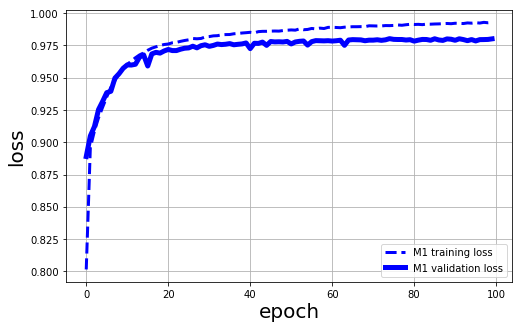

In [7]:
# plot the learning curve
plt.figure(figsize=(8,5))
plt.plot(hist1.acc, "b--", label="M1 training loss", lw=3)
plt.plot(hist1.val_acc, "b-", label = "M1 validation loss", lw=5)
plt.grid()
plt.legend()
plt.xlabel("epoch", size=20)
plt.ylabel("loss", size=20)

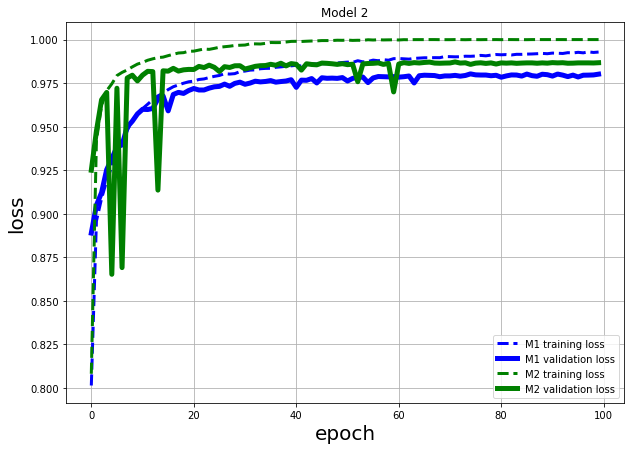

In [27]:
hist2 = pd.read_csv("/Users/samuelflender/mount/projects/deep-learning-test/output/CNN_model2_history.csv")

plt.figure(figsize=(10,7))
plt.plot(hist1.acc, "b--", label="M1 training loss", lw=3)
plt.plot(hist1.val_acc, "b-", label = "M1 validation loss", lw=5)

plt.plot(hist2.acc, "g--", label="M2 training loss", lw=3)
plt.plot(hist2.val_acc, "g-", label = "M2 validation loss", lw=5)

plt.grid()
plt.xlabel("epoch", size=20)
plt.ylabel("loss", size=20)
plt.legend()

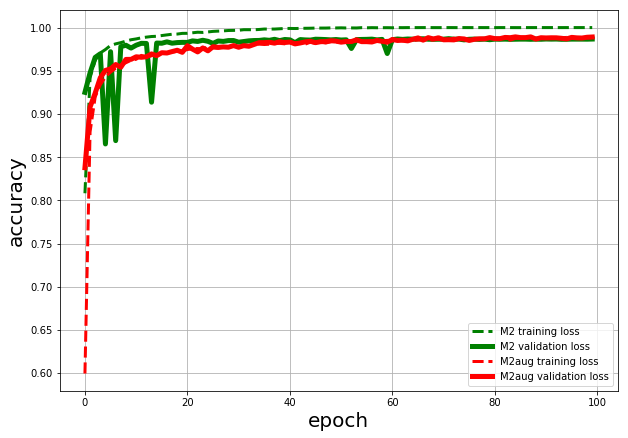

In [57]:
# now compare the non-augmented to the augmented model 2
# notice that augmentation prevents overfitting and performs better on both training and validation set after 100 epochs

hist2aug = pd.read_csv("/Users/samuelflender/mount/projects/deep-learning-test/output/CNN_model2aug_history.csv")

plt.figure(figsize=(10,7))
plt.plot(hist2.acc, "g--", label="M2 training loss", lw=3)
plt.plot(hist2.val_acc, "g-", label = "M2 validation loss", lw=5)

plt.plot(hist2aug.acc, "r--", label="M2aug training loss", lw=3)
plt.plot(hist2aug.val_acc, "r-", label = "M2aug validation loss", lw=5)

plt.grid()
plt.xlabel("epoch", size=20)
plt.ylabel("accuracy", size=20)
plt.legend()

In [52]:
# here are the validation accuracies after training for 100 epochs:

print "M1 final validation accuracy: ", hist1.val_acc.values[len(hist1)-1]
print "M2 final validation accuracy: ", hist2.val_acc.values[len(hist2)-1]
print "M2aug final validation accuracy: ", hist2aug.val_acc.values[len(hist2aug)-1]

M1 final validation accuracy:  0.98015251755
M2 final validation accuracy:  0.986717842533
M2aug final validation accuracy:  0.9891


In [54]:
#finally let's compare the test set accuracies for the three different models:

test_scores = []

for model in ["model1", "model2", "model2aug"]:
    with open("/Users/samuelflender/mount/projects/deep-learning-test/output/CNN_"+model+"_test_score.txt") as f:
        score =  np.float(f.read().split()[1][:-1])
        print model, ":", score
        test_scores.append( score )

model1 : 0.9833
model2 : 0.9871
model2aug : 0.9936


I summary, augmented model 2 performs best, with an accuracy on the test set of 99.36%. For comparison, the currently best performing model achieves an accuracy of 99.97%, according to http://yann.lecun.com/exdb/mnist/ . So, there is still room for improvement!